## Import and environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:/Users/Leo-PC/Desktop/OpenClassroom Stuff/Projet 2/datas/"

## Code Pré-analyse

### EdStatsCountry

In [2]:
country = pd.read_csv(path + 'EdStatsCountry.csv')
country

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [3]:
print(country.shape)
#Il y'a un total de 32 colonnes pour 241 entités
all_countries = country['Short Name'].tolist()
print(all_countries)

(241, 32)
['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro area', 'Eritrea', 'Spain', 'Es

In [4]:
countries_only = country.dropna(subset=['Income Group'])
#print(countries_only.columns)
all_countries = countries_only['Short Name'].tolist()
print(len(countries_only) , '\n' , all_countries)

214 
 ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Gr

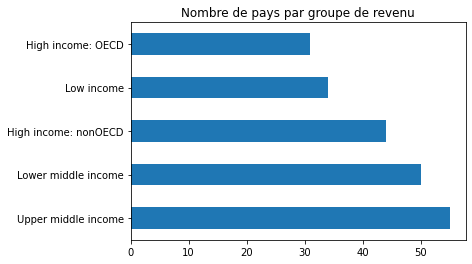

In [5]:
#all_incomes = set(countries_only['Income Group'].tolist())
#print(all_incomes)
income_count = countries_only['Income Group'].value_counts()
income_count.plot(kind='barh')
plt.title('Nombre de pays par groupe de revenu')
plt.show()

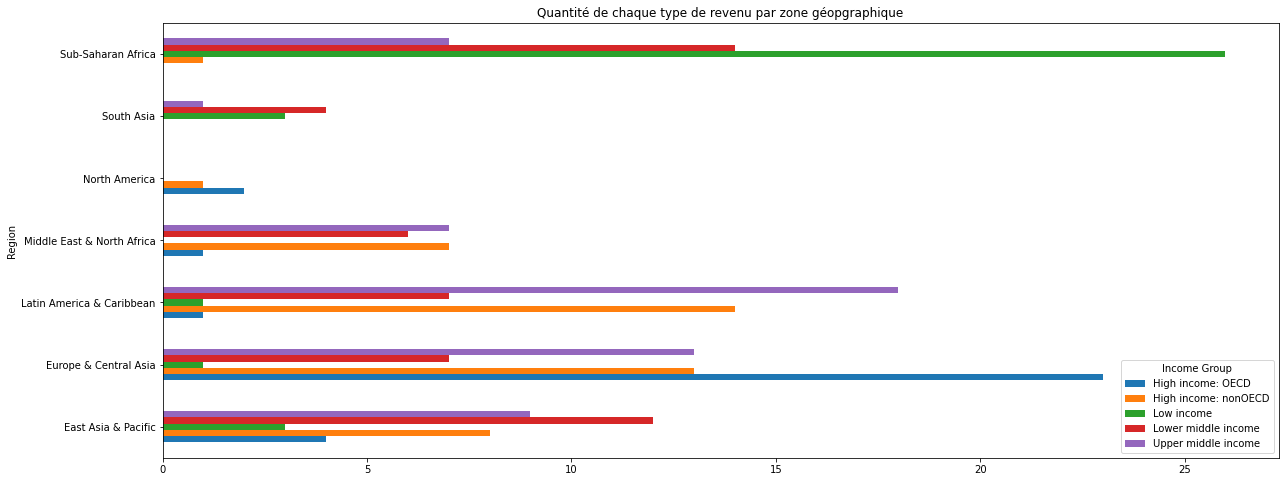

In [6]:
countries_only.groupby(['Region','Income Group']).size().unstack().plot(kind='barh',stacked=False)
plt.gcf().set_size_inches(20, 8)
#using gcf to get the current figure
plt.title('Quantité de chaque type de revenu par zone géopgraphique')
plt.show()

### EdStatsCountry_series

In [7]:
country_series = pd.read_csv(path + 'EdStatsCountry-series.csv')
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [8]:
print(country_series.shape)

(613, 4)


In [9]:
country_code = country_series['CountryCode'].unique()
print(country_code, len(country_code))

['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC' 'NLD' 'NOR'
 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRK'
 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'S

### EdStatsData

In [10]:
data = pd.read_csv(path + 'EdStatsData.csv')
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(data.shape)
names = data["Country Name"].unique()
codes = data["Country Code"].unique()
indicators = data["Indicator Name"].unique()
print(len(names))
print(len(codes))
print(indicators , len(indicators))

(886930, 70)
242
242
['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 ... 'Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)'] 3665


In [12]:
new_data = data[data['Country Name'].isin(all_countries)]
new_data.shape

(714675, 70)

In [13]:
new_data_counted = new_data.groupby('Country Name').count()
new_data_counted

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3665,3665,3665,523,139,158,236,351,537,164,...,0,0,0,0,0,0,0,0,0,0
Albania,3665,3665,3665,409,78,74,50,50,410,105,...,308,308,308,308,308,308,308,308,308,0
Algeria,3665,3665,3665,416,190,298,325,327,688,328,...,308,308,308,308,308,308,308,308,308,0
American Samoa,3665,3665,3665,2,9,23,23,23,23,21,...,0,0,0,0,0,0,0,0,0,0
Andorra,3665,3665,3665,41,63,63,63,63,99,63,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,3665,3665,3665,131,131,127,131,131,106,127,...,308,308,308,308,308,308,308,308,308,0
Vietnam,3665,3665,3665,410,50,50,50,50,410,120,...,308,308,308,308,308,308,308,308,308,0
West Bank and Gaza,3665,3665,3665,35,35,35,35,35,36,41,...,308,308,308,308,308,308,308,308,308,0


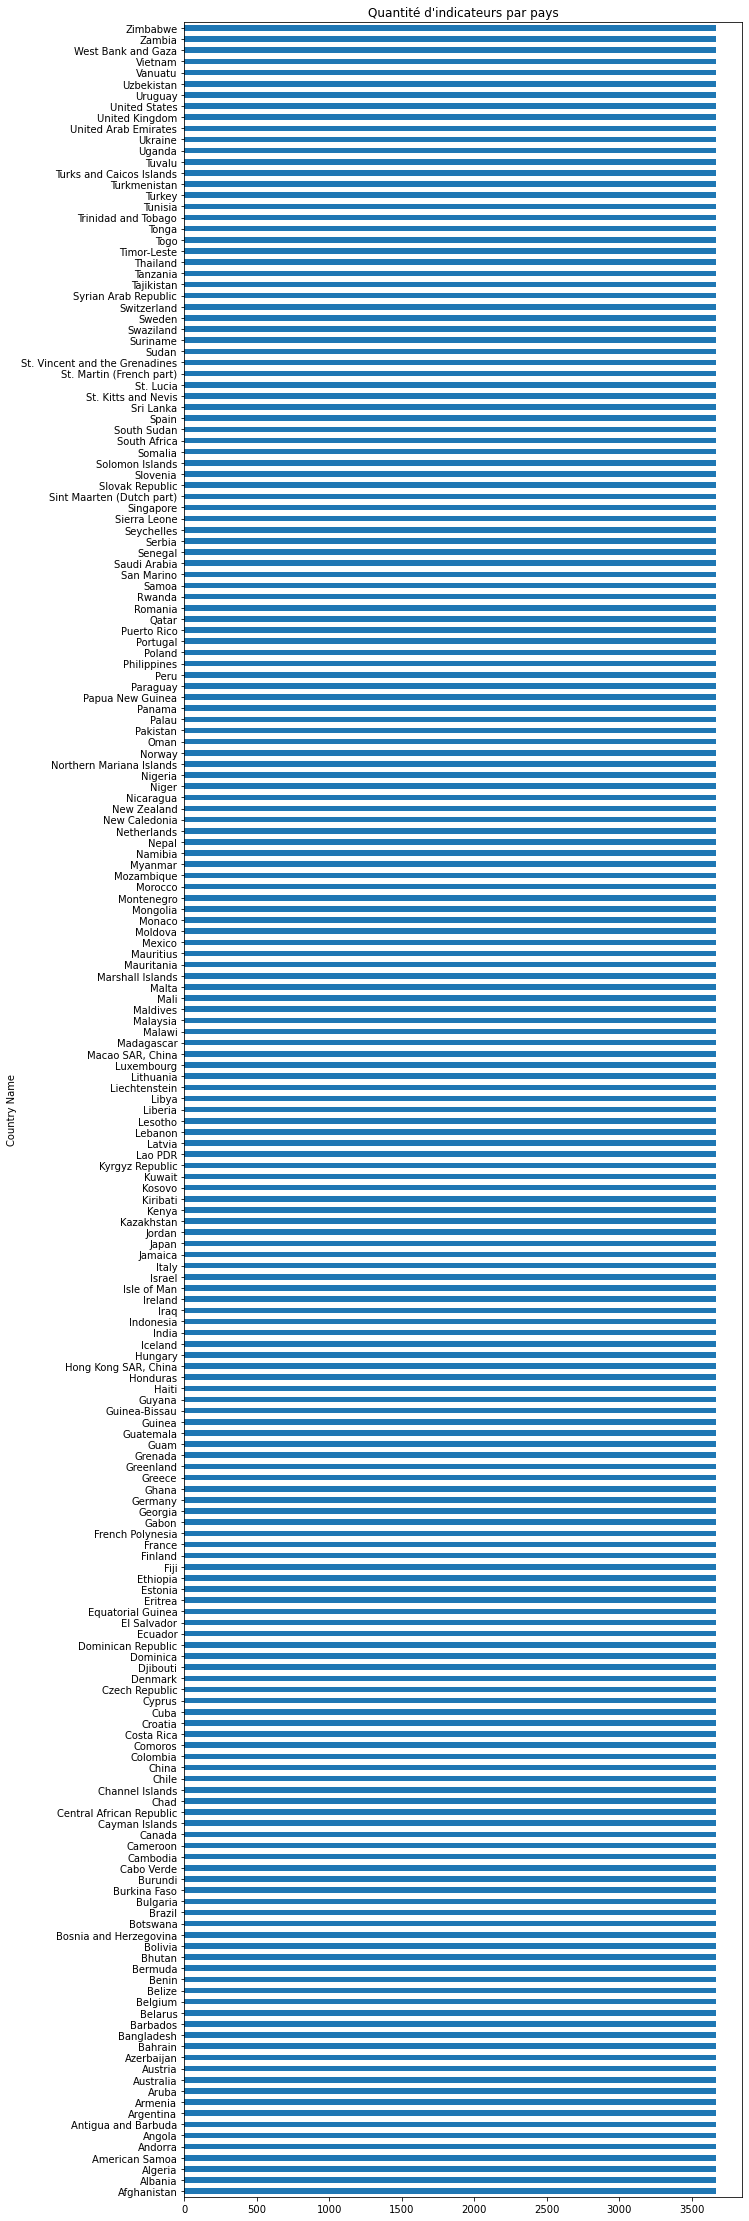

In [14]:
new_data.groupby("Country Name")["Indicator Name"].count().plot(kind ='barh')
plt.gcf().set_size_inches(10, 40)
plt.title("Quantité d'indicateurs par pays")
plt.show()

### EdStatsFootNote

In [15]:
footnote = pd.read_csv(path + 'EdStatsFootNote.csv')
footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [16]:
new_data_regroup = new_data.copy()

new_data_regroup.loc[:,'1970s'] = new_data[[str(year) for year in range(1970,1980,1)]].mean(1)
new_data_regroup.loc[:,'1980s'] = new_data[[str(year) for year in range(1980,1990,1)]].mean(1)
new_data_regroup.loc[:,'1990s'] = new_data[[str(year) for year in range(1990,2000,1)]].mean(1)
new_data_regroup.loc[:,'2000s'] = new_data[[str(year) for year in range(2000,2010,1)]].mean(1)
new_data_regroup.loc[:,'2010s'] = new_data[[str(year) for year in range(2010,2017,1)]].mean(1)
new_data_regroup.loc[:,'2020s'] = new_data[[str(year) for year in [2020,2025]]].mean(1)
new_data_regroup.loc[:,'2030s'] = new_data[[str(year) for year in [2030,2035]]].mean(1)
new_data_regroup.loc[:,'2040s'] = new_data[[str(year) for year in [2040,2045]]].mean(1)
new_data_regroup.loc[:,'2050s'] = new_data[[str(year) for year in [2050,2055]]].mean(1)
new_data_regroup.loc[:,'2060s'] = new_data[[str(year) for year in [2060,2065]]].mean(1)
new_data_regroup.loc[:,'2070s'] = new_data[[str(year) for year in [2070,2075]]].mean(1)
new_data_regroup.loc[:,'2080s'] = new_data[[str(year) for year in [2080,2085]]].mean(1)
new_data_regroup.loc[:,'2090s'] = new_data[[str(year) for year in [2090,2095]]].mean(1)
new_data_regroup.loc[:,'2100s'] = new_data[[str(2100)]].mean(1)

new_data_regroup.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)


new_data_regroup.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,7.05911,NaN,17.260189,28.059870,49.032011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,2.53138,NaN,9.431810,15.223100,35.857401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.22154,NaN,0.386230,0.379130,0.582715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,11.42652,NaN,24.420429,40.152851,61.497005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


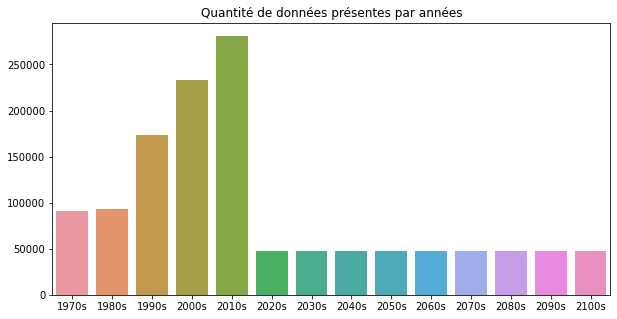

In [17]:
plt.figure(figsize=(10, 5))
all_decade = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s','2050s', '2060s', '2070s', '2080s', '2090s', '2100s']
plt.title('Quantité de données présentes par années')
plot = sns.barplot(y = new_data_regroup.groupby('Country Name')[all_decade].count().sum().values, 
                   x = new_data_regroup.groupby('Country Name')[all_decade].count().sum().index)
plt.show()

In [18]:
new_data_regroup_cleaned = new_data_regroup.drop(['1970s','1980s','1990s','2000s','2020s','2030s','2040s','2050s','2060s','2070s','2080s','2090s','2100s'],axis=1)
new_data_regroup_cleaned.head(5)
new_data_regroup_cleaned

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,49.032011
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,35.857401
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.582715
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,61.497005
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085


### EdStatsSeries

In [19]:
series = pd.read_csv(path + 'EdStatsSeries.csv')
series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
series.shape

(3665, 21)

## Selection des données

### Selection des pays

In [21]:
new_data_regroup_cleaned.head(5)
new_data_regroup_cleaned

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,49.032011
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,35.857401
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.582715
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,61.497005
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085


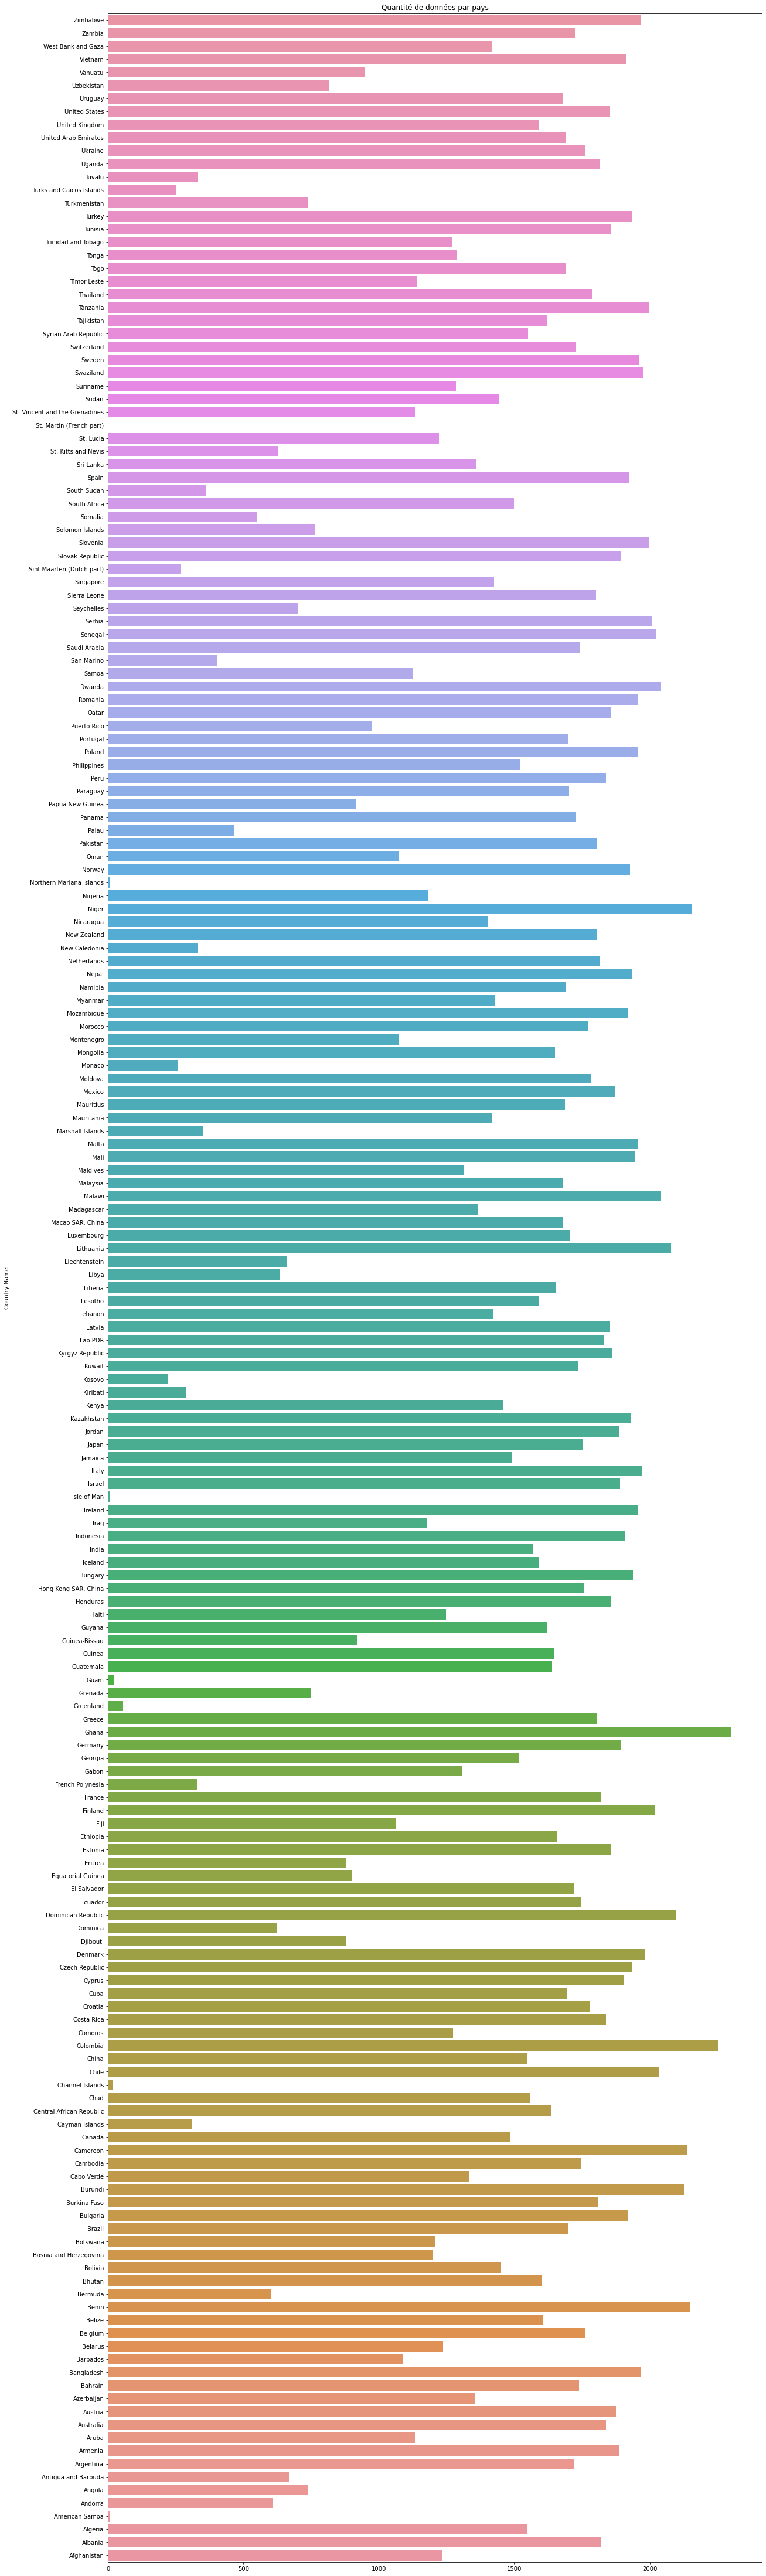

In [22]:
plt.figure(figsize=(20, 80))
plt.title('Quantité de données par pays')
plot = sns.barplot(new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().values, 
                   new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().index)
plt.gca().invert_yaxis()

In [23]:
indexes = new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().index
values = new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().values
data_per_country = dict(zip(indexes,values))


#country_to_remove = {k: v for k, v in data_per_country.items() if v <= 1500}
country_to_keep = {k: v for k, v in data_per_country.items() if v >= 1500}
list_country_to_keep = list(country_to_keep.keys())
print(len(list_country_to_keep))


indexNames = new_data_regroup_cleaned[~new_data_regroup_cleaned['Country Name'].isin(list_country_to_keep)].index
new_data_regroup_cleaned.drop(indexNames , inplace=True)
new_data_regroup_cleaned

#our_countries  = set(data_country_to_keep['Country Name'].to_list())
#print(our_countries, len(our_countries))

116


,Country Name,Country Code,Indicator Name,Indicator Code,2010s
95290,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,88.222420
95291,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,87.744015
95292,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.989560
95293,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,88.671955
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.446022
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085


### Selection des indicateurs

In [24]:
indicator_occ = new_data_regroup_cleaned.groupby('Indicator Name')['2010s'].count().sort_values(ascending=False)
indicator_occ = pd.DataFrame(indicator_occ)
indicator_occ

,2010s
Indicator Name,
"Population, male",116
"Unemployment, total (% of total labor force)",116
"Population, ages 0-14 (% of total)",116
"Population, ages 0-14, female",116
"Population, ages 0-14, male",116
...,...
LLECE: Distribution of 4th Grade Reading Scores: 25th Percentile Score,0
LLECE: Distribution of 4th Grade Reading Scores: 10th Percentile Score,0
LLECE: Distribution of 4th Grade Mathematics Scores: 90th Percentile Score,0


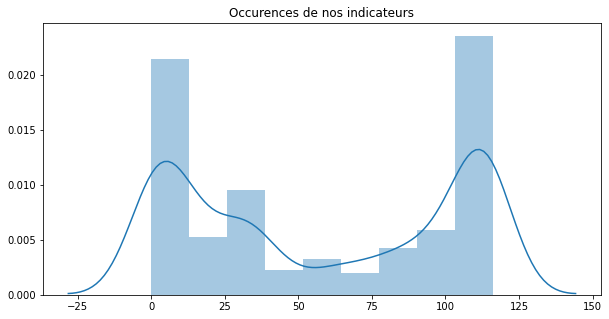

In [25]:
plt.figure(figsize=(10,5))
plt.title('Occurences de nos indicateurs')
sns.distplot(indicator_occ)
plt.show()

In [26]:
indicator_to_keep = indicator_occ[indicator_occ['2010s']>= 100]
list_of_indicators = indicator_to_keep.reset_index()["Indicator Name"].to_list()
print(len(list_of_indicators))

1196


In [27]:
new_data_regroup_cleaned_filtered = new_data_regroup_cleaned[new_data_regroup_cleaned['Indicator Name'].isin(list_of_indicators)]
new_data_regroup_cleaned_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.446022
95295,Albania,ALB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,93.349535
95296,Albania,ALB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.985220
95297,Albania,ALB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,94.750483
95302,Albania,ALB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,80.981613
...,...,...,...,...,...
886917,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,760.565000
886918,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,1544.635000
886919,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,1562.390000
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,1741.100000


In [28]:
new_data_regroup_cleaned_filtered = new_data_regroup_cleaned_filtered.dropna(subset=['2010s'])
new_data_regroup_cleaned_filtered

list_of_indicators

['Population, male',
 'Unemployment, total (% of total labor force)',
 'Population, ages 0-14 (% of total)',
 'Population, ages 0-14, female',
 'Population, ages 0-14, male',
 'Population, ages 0-14, total',
 'Percentage of students in primary education who are female (%)',
 'Official entrance age to lower secondary education (years)',
 'Official entrance age to pre-primary education (years)',
 'Percentage of students in lower secondary general education who are female (%)',
 'Official entrance age to primary education (years)',
 'Official entrance age to upper secondary education (years)',
 'Population, ages 15-64 (% of total)',
 'Population, ages 15-64, female',
 'Population, ages 15-64, male',
 'Population, ages 15-64, total',
 'Internet users (per 100 people)',
 'Population of the official age for lower secondary education, both sexes (number)',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Unemployment, female (% of female labor force)',
 'Enrolment in 

In [29]:
indicateurs = ['Population, total',
'Internet users (per 100 people)',
'Enrolment in upper secondary education, both sexes (number)',
'Enrolment in tertiary education, all programmes, both sexes (number)',
'Population, ages 15-24, total']
#'Enrolment in post-secondary non-tertiary education, both sexes (number)']

#réalisons un idx to word pour simplifier la présentation

word_to_id = {token: token if token.isdigit() else idx for idx, token in enumerate(set(indicateurs))}
print(word_to_id)

{'Enrolment in upper secondary education, both sexes (number)': 0, 'Population, total': 1, 'Enrolment in tertiary education, all programmes, both sexes (number)': 2, 'Population, ages 15-24, total': 3, 'Internet users (per 100 people)': 4}


## Analyse exploratoire des données

In [30]:
indicators_data = new_data_regroup_cleaned_filtered[new_data_regroup_cleaned_filtered['Indicator Name'].isin(indicateurs)]

indicators_data_copy = indicators_data.copy()
indicators_data_copy.loc[:,'Indicator Name'] = indicators_data['Indicator Name'].map(word_to_id)
indicators_data_copy
#print(set(indicators_data['Indicator Name'].to_list()))

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
96494,Albania,ALB,2,SE.TER.ENRL,1.542362e+05
96504,Albania,ALB,0,UIS.E.3,1.498670e+05
96665,Albania,ALB,4,IT.NET.USER.P2,5.651033e+01
97772,Albania,ALB,3,SP.POP.1524.TO.UN,5.856280e+05
97823,Albania,ALB,1,SP.POP.TOTL,2.894231e+06
...,...,...,...,...,...
884469,Zimbabwe,ZWE,2,SE.TER.ENRL,1.023196e+05
884479,Zimbabwe,ZWE,0,UIS.E.3,4.857640e+05
884640,Zimbabwe,ZWE,4,IT.NET.USER.P2,1.493251e+01
885747,Zimbabwe,ZWE,3,SP.POP.1524.TO.UN,3.370104e+06


In [31]:
#indicators_data.sort_values(["Indicator Name"])
merged_left = pd.merge(left=indicators_data_copy, right=countries_only, how='left', left_on='Country Name', right_on='Short Name')
indicators_data_copy = merged_left.drop(['Country Code_x','Country Code_y', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31'], axis=1)
indicators_data_copy.head(5)

,Country Name,Indicator Name,Indicator Code,2010s,Region,Income Group
0,Albania,2,SE.TER.ENRL,1.542362e+05,Europe & Central Asia,Upper middle income
1,Albania,0,UIS.E.3,1.498670e+05,Europe & Central Asia,Upper middle income
2,Albania,4,IT.NET.USER.P2,5.651033e+01,Europe & Central Asia,Upper middle income
3,Albania,3,SP.POP.1524.TO.UN,5.856280e+05,Europe & Central Asia,Upper middle income
4,Albania,1,SP.POP.TOTL,2.894231e+06,Europe & Central Asia,Upper middle income


In [32]:
recap_table_country = indicators_data_copy.pivot(index='Country Name', columns='Indicator Name', values='2010s')
recap_table_country

Indicator Name,0,1,2,3,4
Country Name,,,,,
Albania,149867.00,2.894231e+06,1.542362e+05,5.856280e+05,56.510334
Algeria,1319508.00,3.834750e+07,1.221773e+06,6.869491e+06,25.535075
Argentina,1645002.25,4.253773e+07,2.709143e+06,6.873357e+06,59.227690
Armenia,97679.60,2.896616e+06,1.241345e+05,5.133975e+05,44.589312
Australia,1060782.40,2.308494e+07,1.361789e+06,2.921038e+06,82.105767
...,...,...,...,...,...
United States,11728330.80,3.162575e+08,2.027375e+07,4.524368e+07,73.035771
Uruguay,118060.00,3.408561e+06,1.506605e+05,5.192428e+05,57.486919
Vietnam,NaN,8.978640e+07,2.319985e+06,1.777147e+07,38.860000


In [33]:
recap_table_country = recap_table_country.dropna()
recap_table_country

Indicator Name,0,1,2,3,4
Country Name,,,,,
Albania,149867.00,2.894231e+06,1.542362e+05,5.856280e+05,56.510334
Algeria,1319508.00,3.834750e+07,1.221773e+06,6.869491e+06,25.535075
Argentina,1645002.25,4.253773e+07,2.709143e+06,6.873357e+06,59.227690
Armenia,97679.60,2.896616e+06,1.241345e+05,5.133975e+05,44.589312
Australia,1060782.40,2.308494e+07,1.361789e+06,2.921038e+06,82.105767
...,...,...,...,...,...
United Arab Emirates,139337.20,8.906379e+06,1.282603e+05,7.128560e+05,84.357143
United Kingdom,3325021.90,6.417615e+07,2.441278e+06,7.904708e+06,89.441457
United States,11728330.80,3.162575e+08,2.027375e+07,4.524368e+07,73.035771


In [34]:
list(recap_table_country.columns)
word_to_id

{'Enrolment in upper secondary education, both sexes (number)': 0,
 'Population, total': 1,
 'Enrolment in tertiary education, all programmes, both sexes (number)': 2,
 'Population, ages 15-24, total': 3,
 'Internet users (per 100 people)': 4}

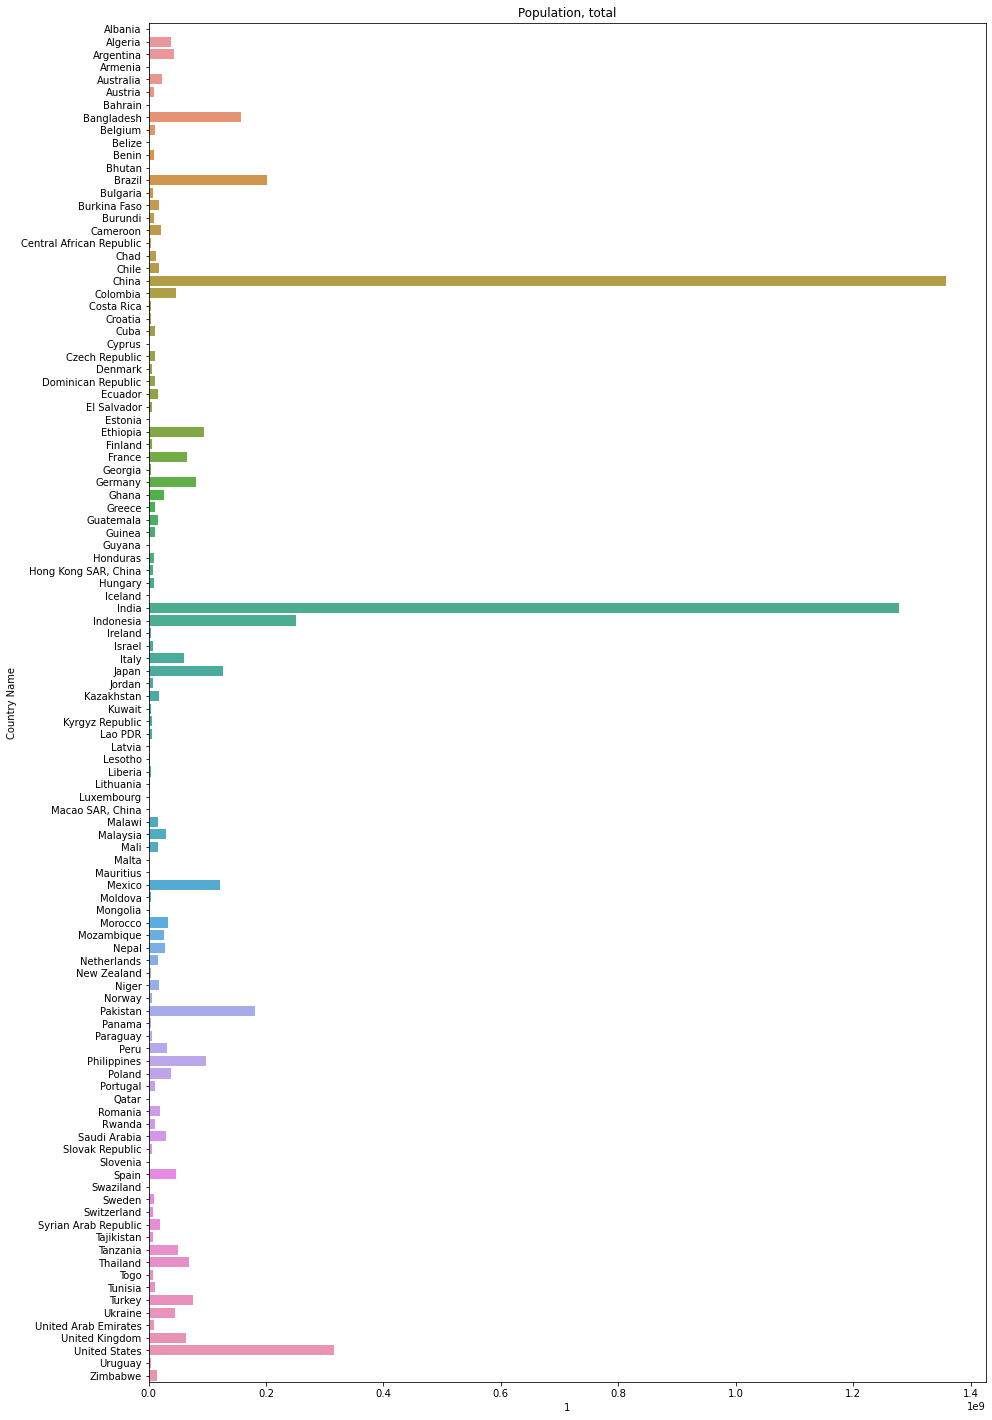

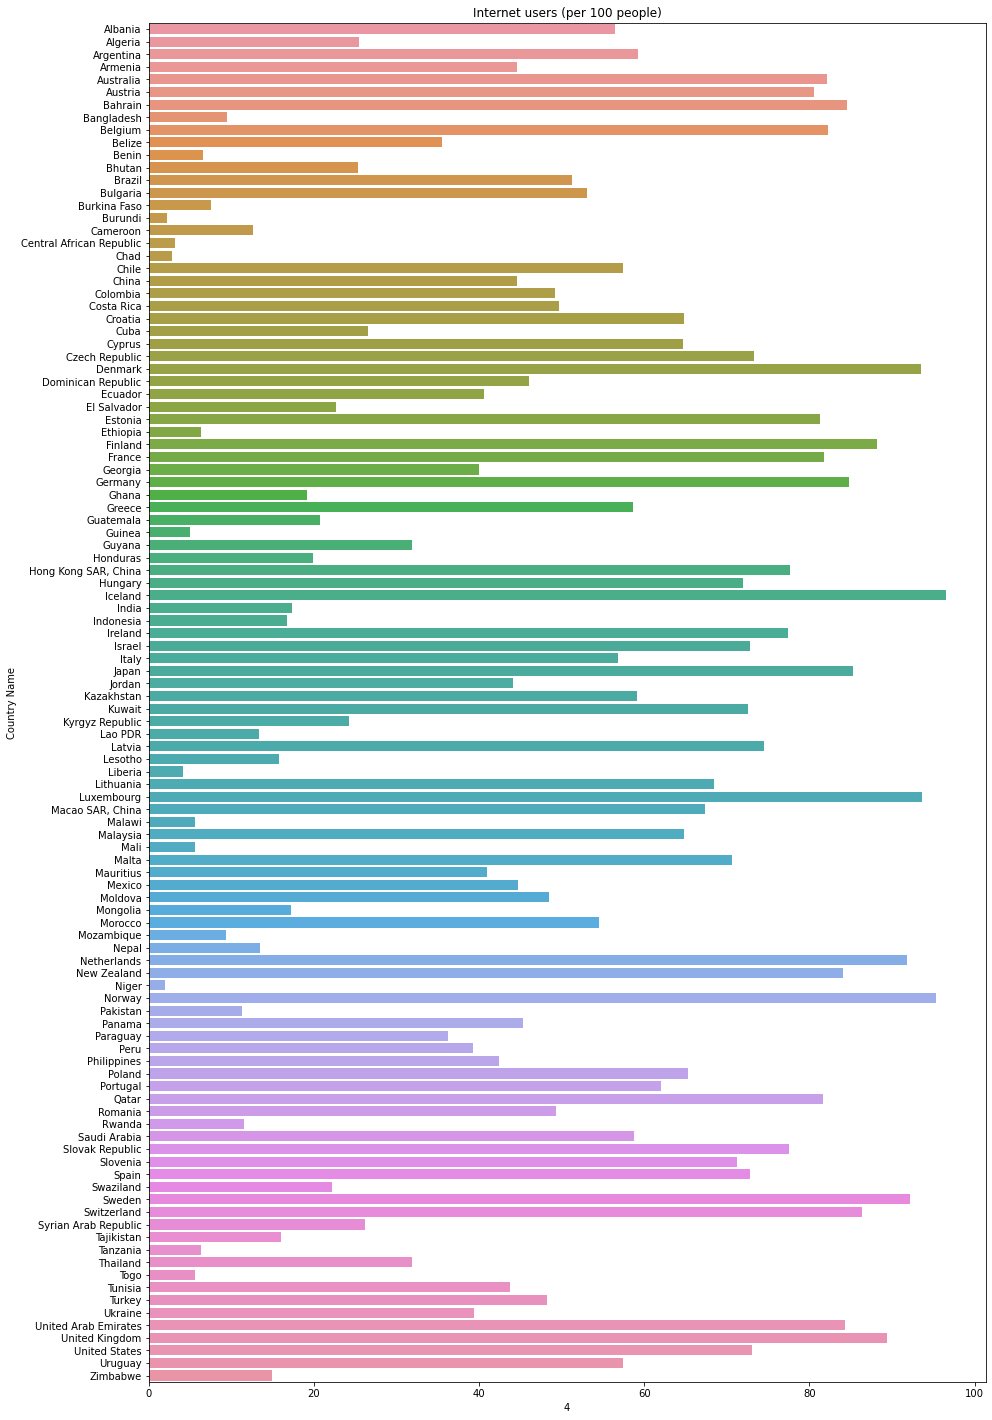

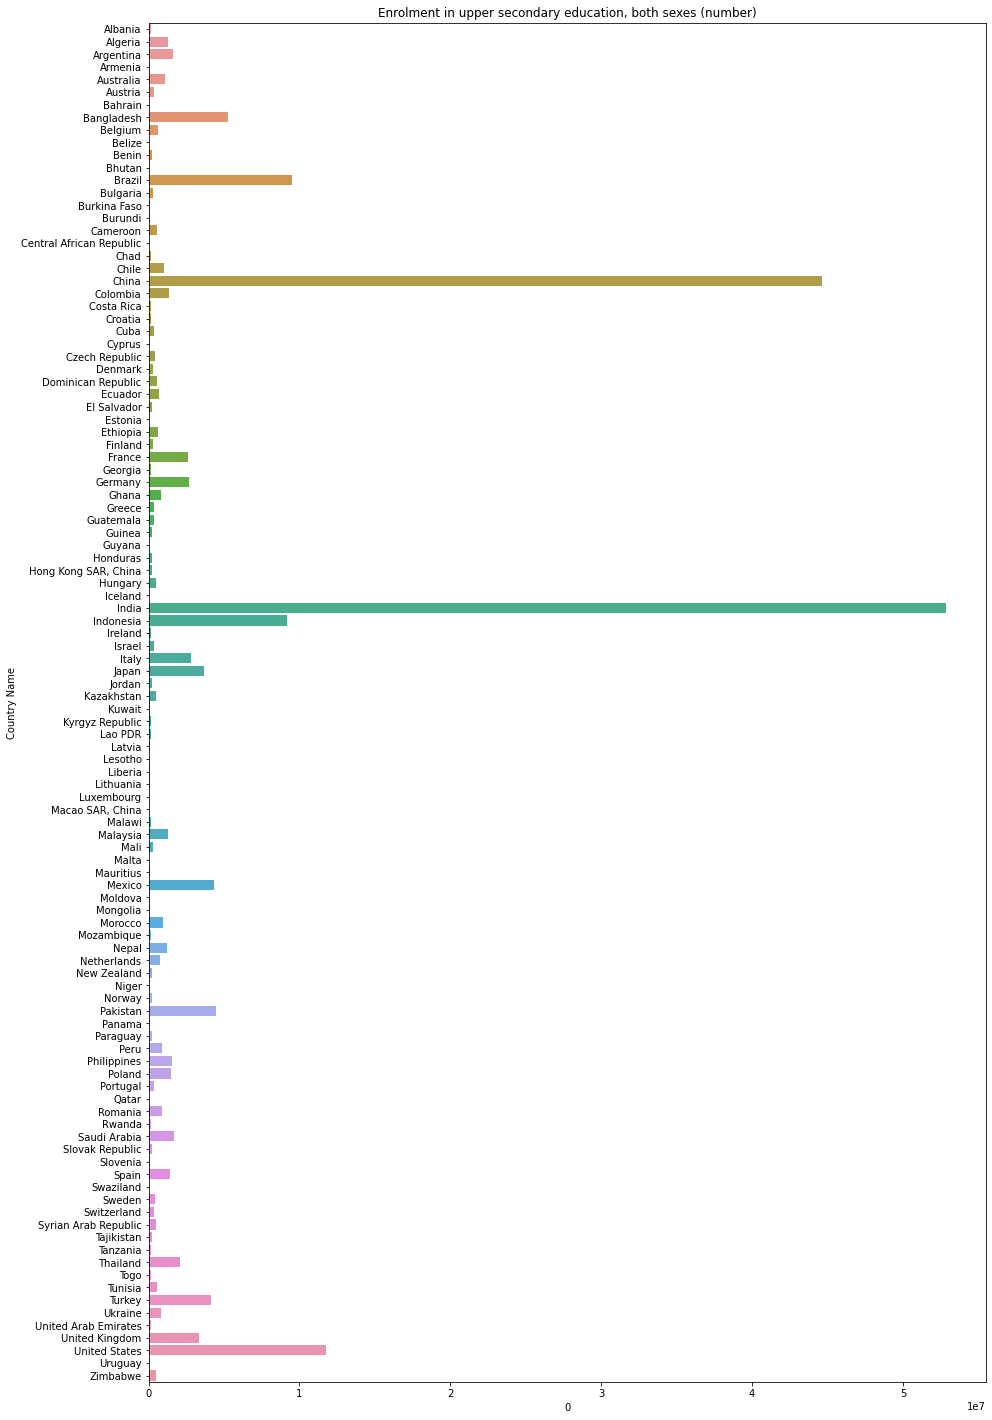

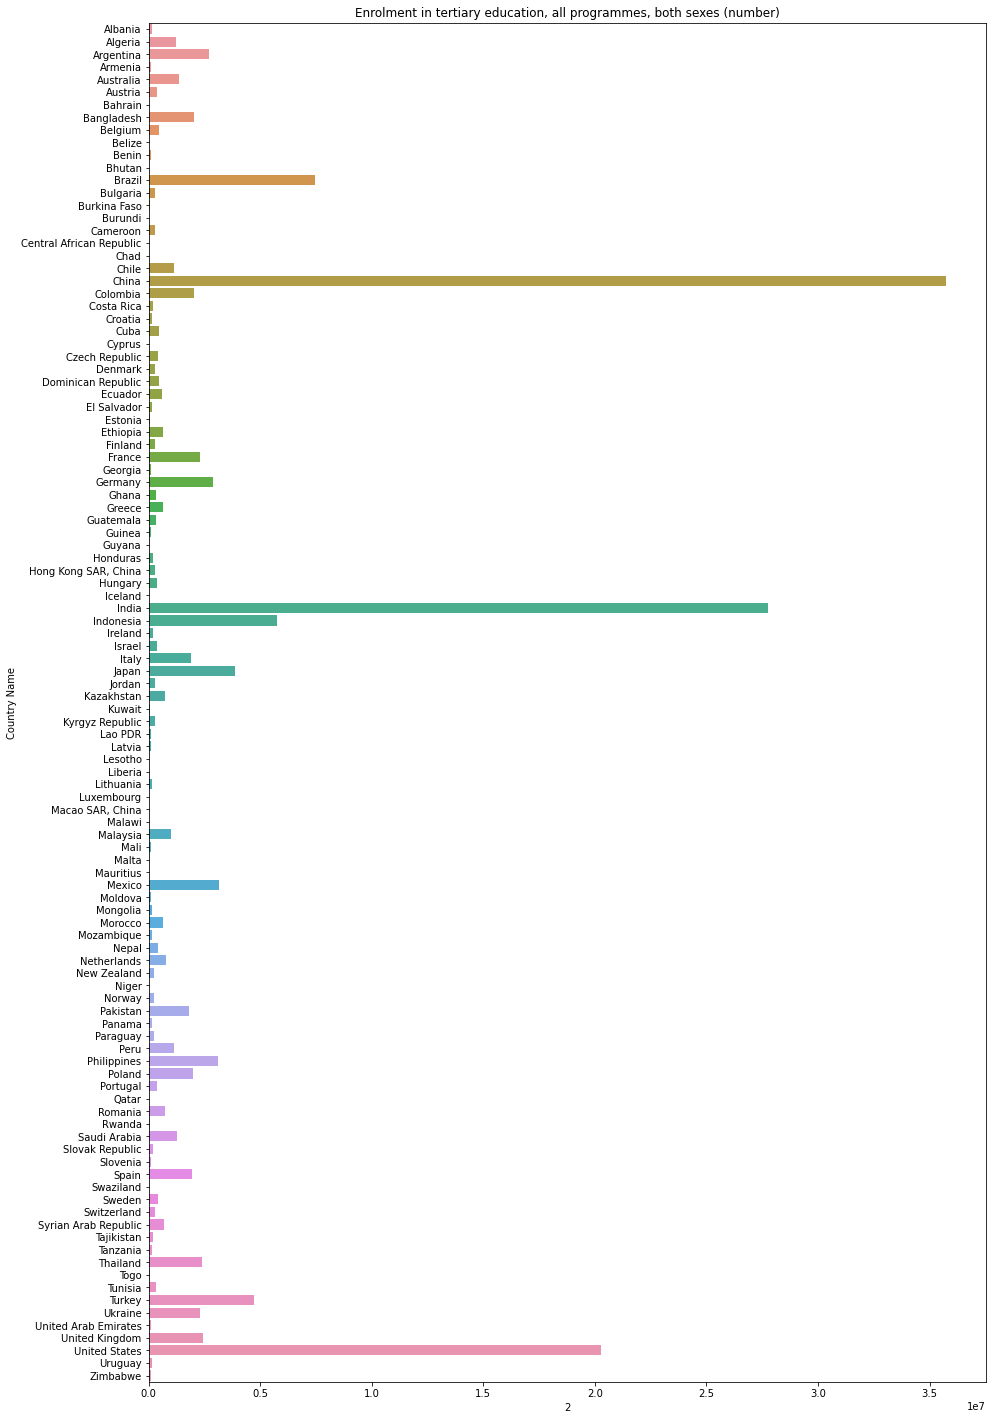

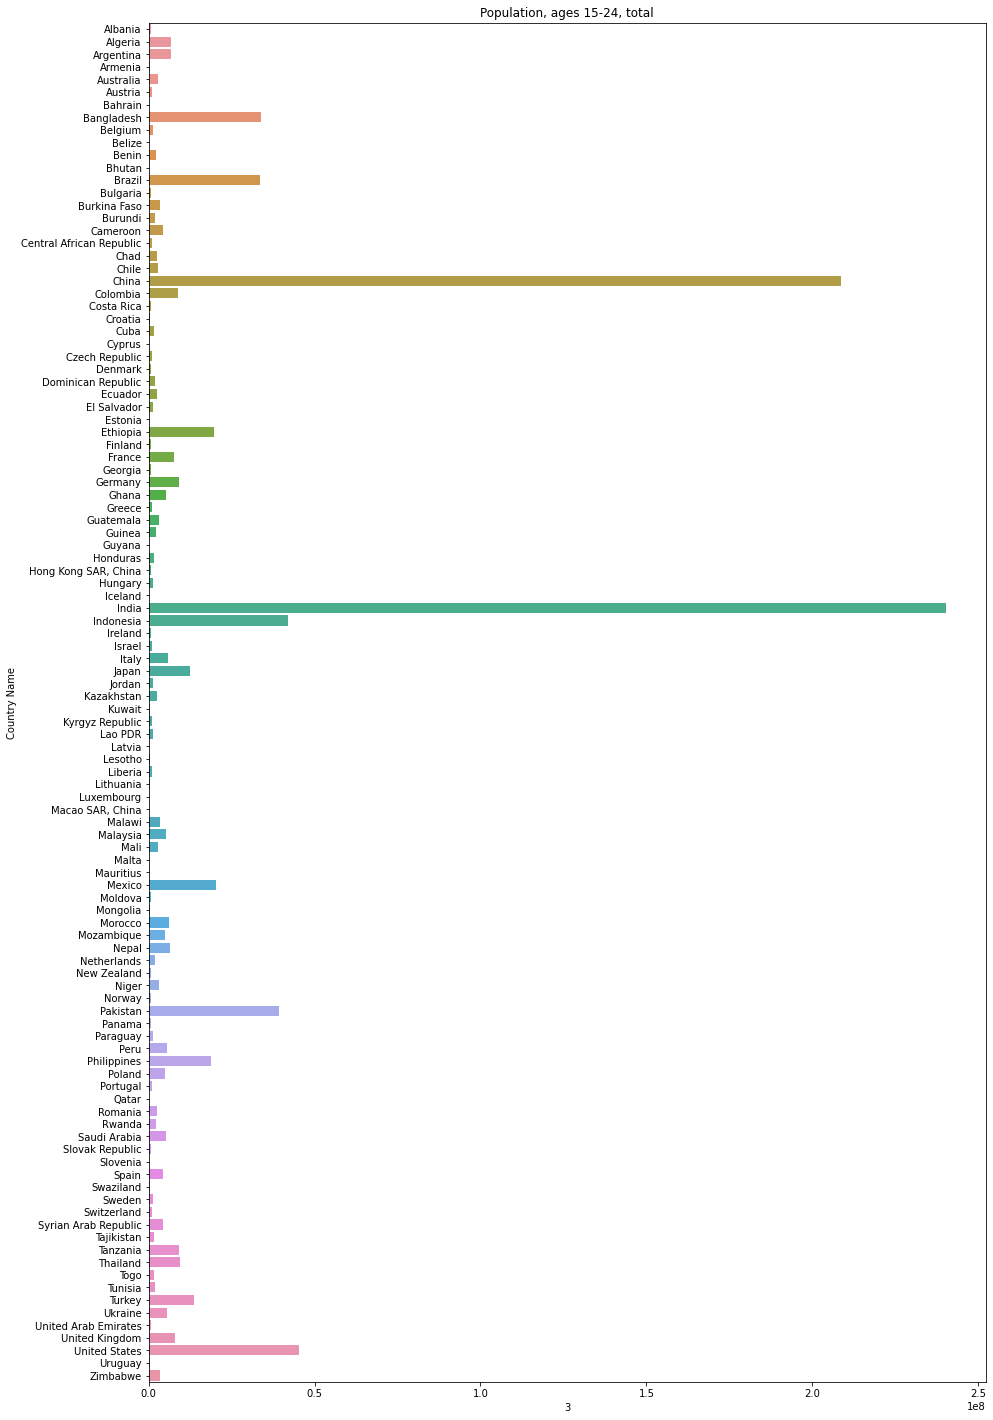

In [35]:
for i in range(len(indicateurs)):
    plt.figure(figsize=(15, 25))
    plt.title(str(indicateurs[i]))
    sns.barplot(data = recap_table_country, y = recap_table_country.index, 
                x = recap_table_country.columns[word_to_id[indicateurs[i]]])
    plt.show()

In [36]:
recap_table_region = indicators_data_copy.pivot_table(index= "Region", columns='Indicator Name', values='2010s',aggfunc='mean')
recap_table_region

Indicator Name,0,1,2,3,4
Region,,,,,
East Asia & Pacific,5.355641e+06,1.487810e+08,4.046668e+06,2.316445e+07,48.358041
Europe & Central Asia,6.998657e+05,1.731753e+07,7.376201e+05,2.212812e+06,68.263846
Latin America & Caribbean,1.219701e+06,3.055970e+07,1.140202e+06,5.212070e+06,40.762602
Middle East & North Africa,4.943649e+05,1.381322e+07,4.223391e+05,2.379126e+06,59.961013
North America,1.172833e+07,3.162575e+08,2.027375e+07,4.524368e+07,73.035771
South Asia,1.276402e+07,3.292469e+08,6.410692e+06,6.398721e+07,15.414601
Sub-Saharan Africa,2.142156e+05,1.754067e+07,1.149653e+05,3.492959e+06,10.742305


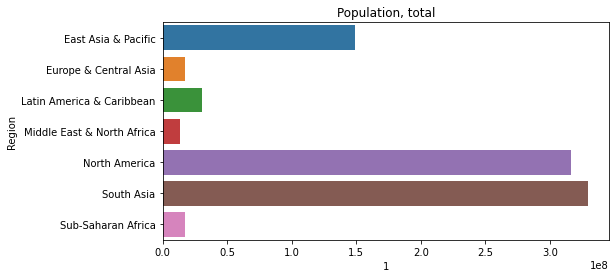

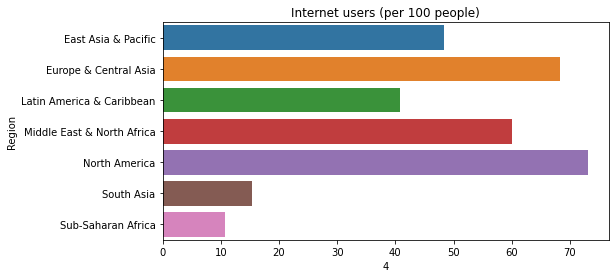

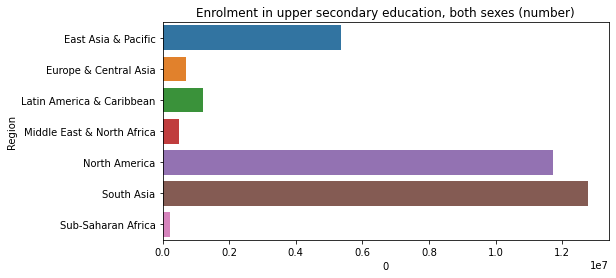

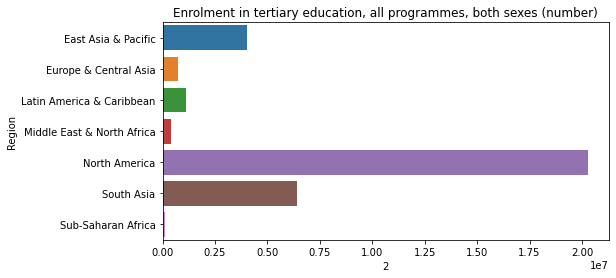

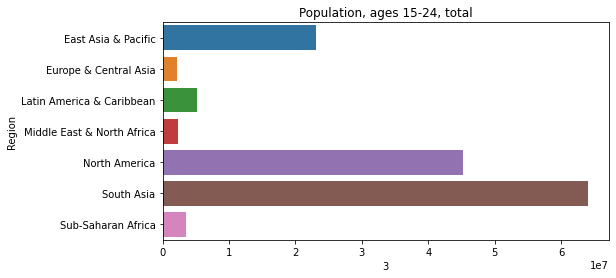

In [37]:
for i in range(len(indicateurs)):
    plt.figure(figsize=(8, 4))
    plt.title(str(indicateurs[i]))
    sns.barplot(data = recap_table_region, y = recap_table_region.index, 
                x = recap_table_region.columns[word_to_id[indicateurs[i]]])
    plt.show()

### Clients potentiels

In [38]:
estimated_client = recap_table_country[((recap_table_country[4]>15) & (recap_table_country[3] > 100000000)) |
                   ((recap_table_country[4]>60) & (recap_table_country[3] > 1000000))].sort_values(by='Country Name',ascending = False)
estimated_client

Indicator Name,0,1,2,3,4
Country Name,,,,,
United States,11728330.80,3.162575e+08,2.027375e+07,4.524368e+07,73.035771
United Kingdom,3325021.90,6.417615e+07,2.441278e+06,7.904708e+06,89.441457
Sweden,434346.80,9.620787e+06,4.444145e+05,1.191749e+06,92.195800
Spain,1390776.00,4.658360e+07,1.951797e+06,4.416110e+06,72.825133
Portugal,363634.20,1.045522e+07,3.734792e+05,1.166023e+06,62.090294
Poland,1486320.25,3.802222e+07,1.980321e+06,4.853617e+06,65.332414
Netherlands,741759.20,1.681303e+07,7.667995e+05,2.002537e+06,91.822593
Malaysia,1259481.60,2.968043e+07,9.948190e+05,5.272092e+06,64.810759
Japan,3673611.25,1.274841e+08,3.865341e+06,1.235106e+07,85.306401


In [39]:
estimated_client['Total Students'] = estimated_client[1] + estimated_client[2]
final_estimation = estimated_client.copy()
final_estimation = final_estimation.drop([0, 1, 2], axis=1)
final_estimation['Estimated Clients'] = estimated_client['Total Students']* (estimated_client[4]/100)
final_estimation

Indicator Name,3,4,Total Students,Estimated Clients
Country Name,,,,
United States,4.524368e+07,73.035771,3.365312e+08,2.457882e+08
United Kingdom,7.904708e+06,89.441457,6.661743e+07,5.958360e+07
Sweden,1.191749e+06,92.195800,1.006520e+07,9.279693e+06
Spain,4.416110e+06,72.825133,4.853540e+07,3.534597e+07
Portugal,1.166023e+06,62.090294,1.082870e+07,6.723572e+06
Poland,4.853617e+06,65.332414,4.000255e+07,2.613463e+07
Netherlands,2.002537e+06,91.822593,1.757983e+07,1.614225e+07
Malaysia,5.272092e+06,64.810759,3.067525e+07,1.988086e+07
Japan,1.235106e+07,85.306401,1.313494e+08,1.120495e+08


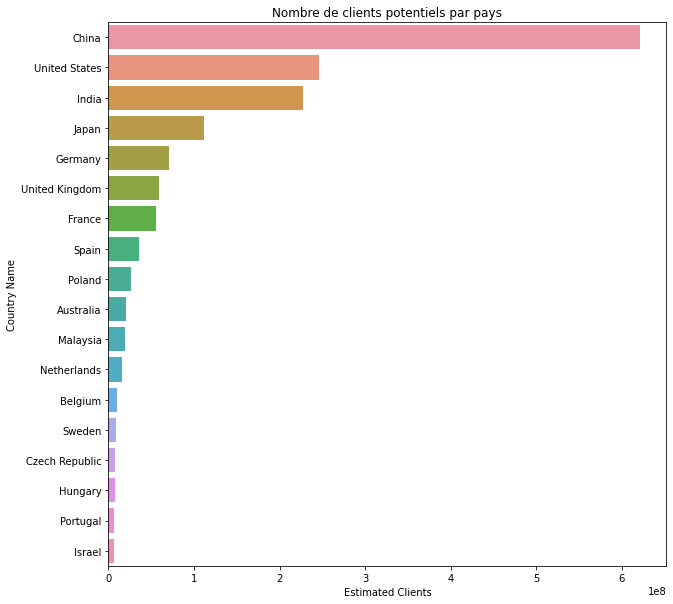

In [40]:
plt.figure(figsize = (10,10))
plt.title('Nombre de clients potentiels par pays')
ax = plt.gca()
final_estimation = final_estimation.sort_values(['Estimated Clients'], ascending = False).reset_index()
sns.barplot(x = final_estimation['Estimated Clients'], y=final_estimation['Country Name'])
plt.show()

In [41]:
valid_countries = final_estimation[final_estimation['Estimated Clients'] > 1000000]['Country Name'].tolist()
print(valid_countries)

['China', 'United States', 'India', 'Japan', 'Germany', 'United Kingdom', 'France', 'Spain', 'Poland', 'Australia', 'Malaysia', 'Netherlands', 'Belgium', 'Sweden', 'Czech Republic', 'Hungary', 'Portugal', 'Israel']


In [42]:
word_to_id

{'Enrolment in upper secondary education, both sexes (number)': 0,
 'Population, total': 1,
 'Enrolment in tertiary education, all programmes, both sexes (number)': 2,
 'Population, ages 15-24, total': 3,
 'Internet users (per 100 people)': 4}

### Prévisions pour le futur

In [43]:
new_data_future = new_data.copy()

new_data_future.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009','Indicator Code','Country Code','Unnamed: 69'], axis=1, inplace=True)

new_data_future_country = new_data_future[new_data_future['Country Name'].isin(valid_countries)]
#print(set(new_data_future_country['Country Name'].to_list()))
new_data_future_country = new_data_future_country[new_data_future_country['Indicator Name'].isin(indicateurs)]

new_data_future_country.head(5)

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
129479,Australia,"Enrolment in tertiary education, all programme...",1276488.0,1.324257e+06,1364203.0,1.390478e+06,1453521.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129489,Australia,"Enrolment in upper secondary education, both s...",990951.0,1.040865e+06,1088366.0,1.079568e+06,1104162.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129650,Australia,Internet users (per 100 people),76.0,7.948770e+01,79.0,8.345350e+01,84.0,8.456052e+01,8.823866e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130757,Australia,"Population, ages 15-24, total",2914315.0,2.922445e+06,2926388.0,2.926254e+06,2922207.0,2.914620e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130808,Australia,"Population, total",22031750.0,2.234002e+07,22728254.0,2.311735e+07,23460694.0,2.378934e+07,2.412716e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


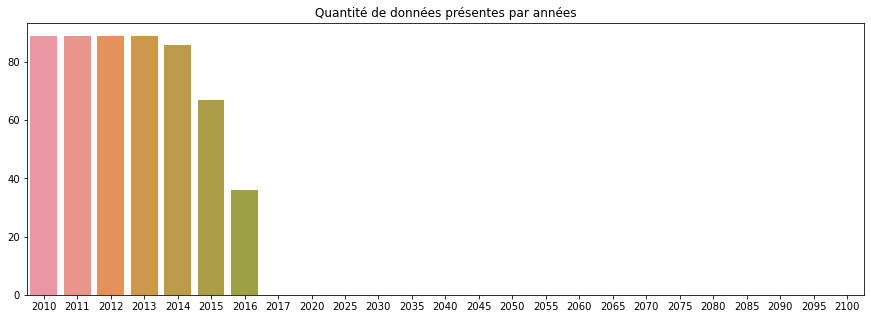

In [44]:
plt.figure(figsize=(15, 5))
all_years = new_data_future_country.columns.to_list()
all_years.remove("Country Name")
all_years.remove("Indicator Name")
#print(all_years)
plt.title('Quantité de données présentes par années')
plot = sns.barplot(y = new_data_future_country.groupby('Country Name')[all_years].count().sum().values, 
                  x = new_data_future_country.groupby('Country Name')[all_years].count().sum().index)
plt.show()

In [45]:
new_data_future_country.drop(['2017','2020','2025','2030','2035','2040','2045','2050','2055',
                      '2060','2065','2070','2075','2080','2085','2090','2095','2100'], axis=1, inplace=True)

In [46]:
new_data_future_country.head(5)

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016
129479,Australia,"Enrolment in tertiary education, all programme...",1276488.0,1.324257e+06,1364203.0,1.390478e+06,1453521.0,NaN,NaN
129489,Australia,"Enrolment in upper secondary education, both s...",990951.0,1.040865e+06,1088366.0,1.079568e+06,1104162.0,NaN,NaN
129650,Australia,Internet users (per 100 people),76.0,7.948770e+01,79.0,8.345350e+01,84.0,8.456052e+01,8.823866e+01
130757,Australia,"Population, ages 15-24, total",2914315.0,2.922445e+06,2926388.0,2.926254e+06,2922207.0,2.914620e+06,NaN
130808,Australia,"Population, total",22031750.0,2.234002e+07,22728254.0,2.311735e+07,23460694.0,2.378934e+07,2.412716e+07


In [47]:
new_data_future_country_copy = new_data_future_country.copy()
new_data_future_country_copy.loc[:,'Indicator Name'] = new_data_future_country['Indicator Name'].map(word_to_id)
new_data_future_country_copy

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016
129479,Australia,2,1.276488e+06,1.324257e+06,1364203.0,1.390478e+06,1453521.0,NaN,NaN
129489,Australia,0,9.909510e+05,1.040865e+06,1088366.0,1.079568e+06,1104162.0,NaN,NaN
129650,Australia,4,7.600000e+01,7.948770e+01,79.0,8.345350e+01,84.0,8.456052e+01,8.823866e+01
130757,Australia,3,2.914315e+06,2.922445e+06,2926388.0,2.926254e+06,2922207.0,2.914620e+06,NaN
130808,Australia,1,2.203175e+07,2.234002e+07,22728254.0,2.311735e+07,23460694.0,2.378934e+07,2.412716e+07
...,...,...,...,...,...,...,...,...,...
847819,United States,2,2.042771e+07,2.101613e+07,20994112.0,1.997262e+07,19700220.0,1.953173e+07,NaN
847829,United States,0,1.170128e+07,1.180938e+07,11748263.0,1.164642e+07,11736315.0,NaN,NaN
847990,United States,4,7.169000e+01,6.972946e+01,74.7,7.140000e+01,73.0,7.455420e+01,7.617674e+01
849097,United States,3,4.513709e+07,4.529614e+07,45343097.0,4.530742e+07,45230846.0,4.514752e+07,NaN


In [48]:
years = ['2010','2011','2012','2013','2014','2015','2016']
new_data_future_country_copy['Years']= new_data_future_country_copy[years].values.tolist()
evolution_list = new_data_future_country_copy.groupby(['Country Name','Indicator Name'])['Years'].apply(list).to_dict()

for key, value in evolution_list.items():
    print(key, ' : ', value)

('Australia', 0)  :  [[990951.0, 1040865.0, 1088366.0, 1079568.0, 1104162.0, nan, nan]]
('Australia', 1)  :  [[22031750.0, 22340024.0, 22728254.0, 23117353.0, 23460694.0, 23789338.0, 24127159.0]]
('Australia', 2)  :  [[1276488.0, 1324257.0, 1364203.0, 1390478.0, 1453521.0, nan, nan]]
('Australia', 3)  :  [[2914315.0, 2922445.0, 2926388.0, 2926254.0, 2922207.0, 2914620.0, nan]]
('Australia', 4)  :  [[76.0, 79.48769771, 79.0, 83.45349717, 84.0, 84.56051935, 88.23865805]]
('Belgium', 0)  :  [[528707.0, 520602.0, 511395.0, 773697.0, 776413.0, nan, nan]]
('Belgium', 1)  :  [[10895586.0, 11047744.0, 11128246.0, 11182817.0, 11209057.0, 11274196.0, 11348159.0]]
('Belgium', 2)  :  [[445309.0, 462419.0, 477712.0, 488488.0, 495910.0, 504745.0, nan]]
('Belgium', 3)  :  [[1263290.0, 1261440.0, 1258349.0, 1254033.0, 1248534.0, 1241946.0, nan]]
('Belgium', 4)  :  [[75.0, 81.609996, 80.71999055, 82.1702, 85.0, 85.0529, 86.5165]]
('China', 0)  :  [[44693168.0, 44543976.0, 44224132.0, 45963232.0, 437092

In [49]:
all_possible_countries = set(new_data_future_country_copy["Country Name"].to_list())
print(all_possible_countries)

{'Israel', 'Poland', 'Netherlands', 'Hungary', 'Sweden', 'China', 'Germany', 'Czech Republic', 'Portugal', 'Australia', 'Belgium', 'India', 'Japan', 'Spain', 'United States', 'France', 'Malaysia', 'United Kingdom'}


In [50]:
final_dataframe = new_data_future_country.copy()
final_dataframe = final_dataframe.melt(id_vars = ['Country Name', 'Indicator Name'], value_vars = ['2013'], 
                                                 var_name = 'Year', value_name = 'Value')
final_dataframe.loc[:,'Indicator Name'] = final_dataframe['Indicator Name'].map(word_to_id)
final_dataframe

,Country Name,Indicator Name,Year,Value
0,Australia,2,2013,1.390478e+06
1,Australia,0,2013,1.079568e+06
2,Australia,4,2013,8.345350e+01
3,Australia,3,2013,2.926254e+06
4,Australia,1,2013,2.311735e+07
...,...,...,...,...
85,United States,2,2013,1.997262e+07
86,United States,0,2013,1.164642e+07
87,United States,4,2013,7.140000e+01
88,United States,3,2013,4.530742e+07


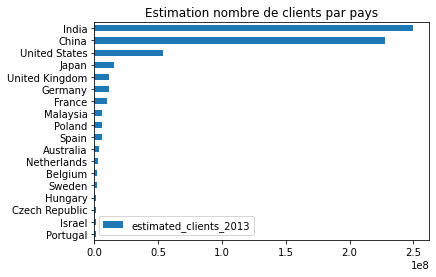

In [51]:
estimated_students_2013 = {}

for country in all_possible_countries:
    n0 = final_dataframe.loc[(final_dataframe['Country Name'] == country) & (final_dataframe['Indicator Name'] == 0)]["Value"]
    n3 = final_dataframe.loc[(final_dataframe['Country Name'] == country) & (final_dataframe['Indicator Name'] == 3)]["Value"]
    n4 = final_dataframe.loc[(final_dataframe['Country Name'] == country) & (final_dataframe['Indicator Name'] == 4)]["Value"]
    estimated_students_2013[country] = float(n3)+float(n4) * (float(n0)/100)
    
final_estimation = pd.DataFrame.from_dict(estimated_students_2013,orient='index',columns=['estimated_clients_2013'])
final_estimation = final_estimation.dropna()
final_estimation = final_estimation.sort_values(by = ["estimated_clients_2013"])

final_estimation.plot(kind = "barh")
plt.title("Estimation nombre de clients par pays")
plt.show()